In [2]:
cd ..

m:\OneDrive\Projects\federated_imputation


In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [73]:
%load_ext autoreload
%autoreload
from src.fed_imp.sub_modules.clustering import FINCH

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
def kmeans_clustering(data):
    silhouette_scores = []
    K_range = range(2, len(data))
    for k in K_range:
        kmeans = KMeans(n_clusters=k)
        labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))

    # find the optimal number of clusters based on the silhouette score
    optimal_k = K_range[np.argmax(silhouette_scores)]
    print("Optimal number of clusters: {}".format(optimal_k))
    kmeans = KMeans(n_clusters=optimal_k)
    labels = kmeans.fit_predict(data)
    return labels

In [26]:
# vis data points
def vis_data(x):
    fig = plt.figure(figsize=(5, 3))
    y = np.zeros(x.shape[0])
    plt.scatter(x, y)
    plt.xticks(np.linspace(0, 1, 11))
    plt.show()

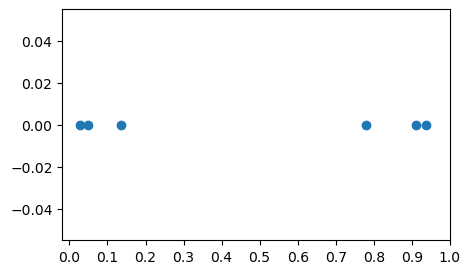

[0.02679897 0.0484039  0.13501667 0.78019301 0.9107032  0.93620228]


array([1, 1, 3, 2, 0, 0], dtype=int64)

In [94]:
# simulate one dimensional clusters
np.random.seed(1003928)
means = [0.1, 0.9]
std = 0.05
data = np.concatenate([np.random.normal(m, std, 3) for m in means])
vis_data(data)
data = np.sort(data)
print(data)
agg = AgglomerativeClustering(
    n_clusters = None,affinity='l1', linkage='average', distance_threshold=0.05
)
agg.fit_predict(data.reshape(-1, 1))

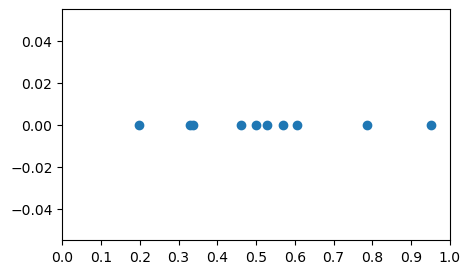

[0.1977719  0.32948372 0.33623321 0.46015426 0.50082201 0.52915642
 0.56891282 0.60632791 0.78541776 0.95134347]
[4 5 5 6 2 2 0 0 3 1]


{0, 1, 2, 3, 4, 5, 6}

In [96]:
np.random.seed(100323)
data = np.random.rand(10)
data = np.sort(data)
vis_data(data)
print(data)
data = data.reshape(-1, 1)
#FINCH(data,distance = 'l1', verbose=False)
agg = AgglomerativeClustering(
    n_clusters = None,affinity='l1', linkage='average', distance_threshold=0.05
)
ret = agg.fit_predict(data)
print(ret)
set(ret)